                         Finding Heavy Traffic Indicators on I-94
The aim of this project is to explore the factors that are contributing to the traffic on a portion of the I-94 Interstate highway. These factors include weather, time of day among others.

First, we'll import the dataset and then take a sneak peak at the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.info() #to display column datatypes and the non-null value count for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
traffic.head() #the first five rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail() # the last 5 rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


Next, we are going to examine the distribution of the traffic column using a histogram.

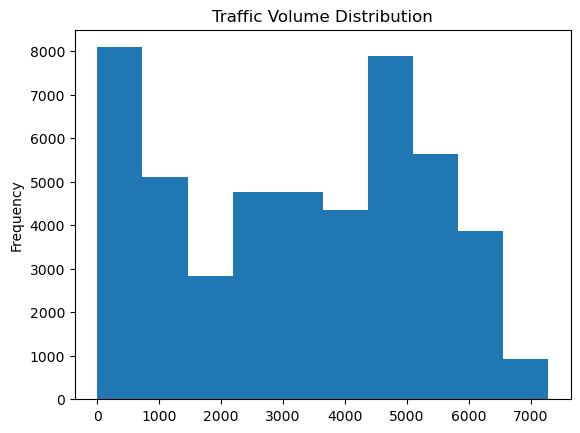

In [4]:
%matplotlib inline
traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume Distribution')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the results, we can conclude that most of the time(about 75%), there are more than 4900 cars on the road. 
Less often(about 25%), there are 1193 cars on the road WHICH is probably during the night.

It is highly likely that time of day is a great determinant for how much traffic is on the road.

Next we'll separate the day time and night time data in order to distinguish what time of day the traffic is in plenty.

In [6]:
import datetime as dt
datetime = pd.to_datetime(traffic['date_time'])
day = traffic.copy()[(datetime.dt.hour >= 7) & (datetime.dt.hour < 19)]
night = traffic.copy()[(datetime.dt.hour >= 19) | (datetime.dt.hour < 7)]

Let's plot the data to get a better visual.

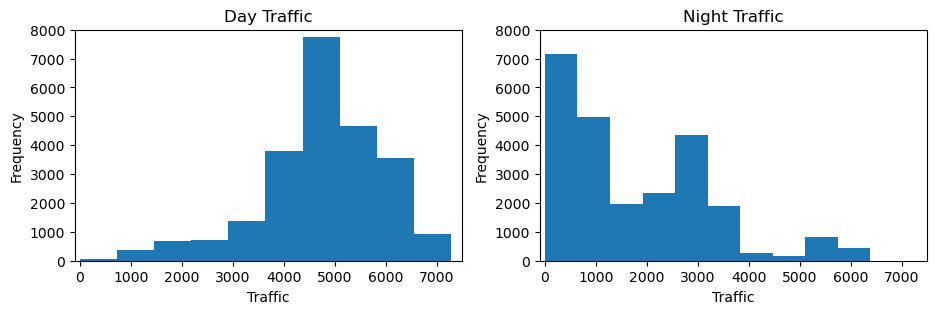

In [7]:
plt.figure(figsize=(11, 3))
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.xlim(-100, 7500)
plt.ylim(0,8000)
plt.title('Day Traffic')
plt.ylabel('Frequency')
plt.xlabel('Traffic')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0,8000)
plt.title('Night Traffic')
plt.ylabel('Frequency')
plt.xlabel('Traffic')
plt.show()

In [8]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can tell that the day time histogram is left skewed while the night time histogram is right skewed. This means that the traffic mostly occurs during the day vs at night. Also, based on the values, we can tell that 75% of the time during the day, there are over 5500 cars on the road compared to the 2800 cars on the road at night which is quite a big difference. We can conclude that the traffic mainly occurs during the day and since our focus is to find heavy traffic indicators, we can do away with the night time data.


We know that one of the traffic indicators is time. There may be more people on the road in a certain month, day or month. Next, we'd like to visualize how the traffic has changed overtime.

/var/folders/25/_g0dwxk50c55q9lqb8pbn9nc0000gp/T/ipykernel_4115/3045797866.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean() #find the average traffic per month


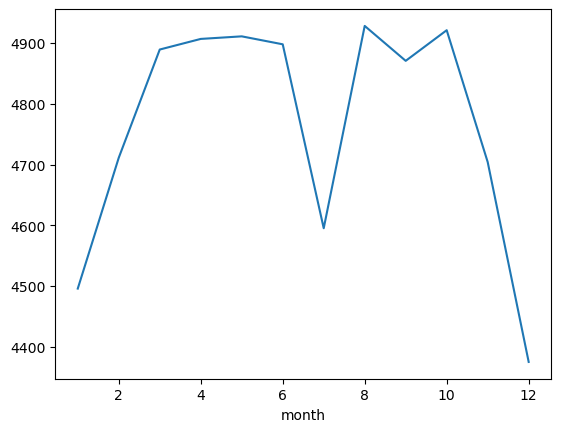

In [10]:
day['date_time'] = pd.to_datetime(day['date_time'])
day['month'] = day['date_time'].dt.month #extract the month and create a new month column in the "day" dataset
by_month = day.groupby('month').mean() #find the average traffic per month
by_month['traffic_volume'].plot.line()
plt.show()


It looks like the traffic is heavy during the warmer months except July.

/var/folders/25/_g0dwxk50c55q9lqb8pbn9nc0000gp/T/ipykernel_4115/2194323915.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = day.groupby('dayofweek').mean() # 0 is Monday, 6 is Sunday


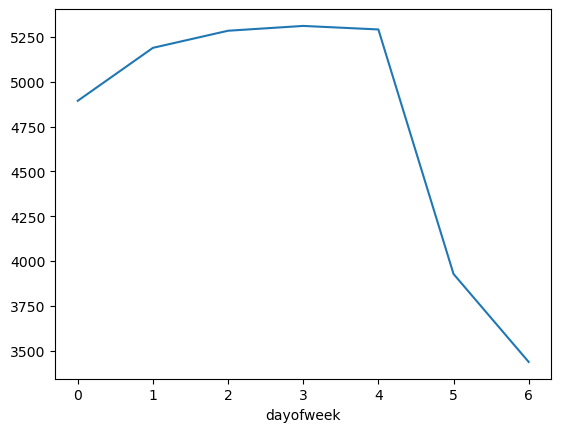

In [11]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean() # 0 is Monday, 6 is Sunday
by_dayofweek['traffic_volume'].plot.line() 
plt.show()

/var/folders/25/_g0dwxk50c55q9lqb8pbn9nc0000gp/T/ipykernel_4115/2014129984.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
/var/folders/25/_g0dwxk50c55q9lqb8pbn9nc0000gp/T/ipykernel_4115/2014129984.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


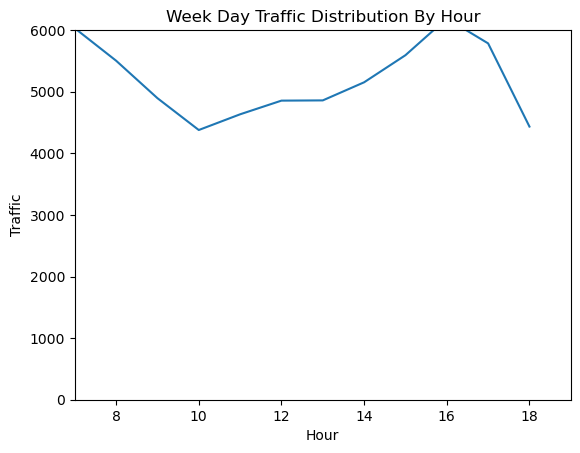

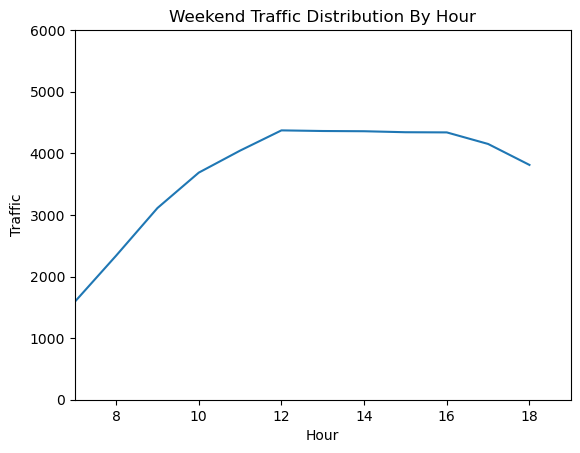

In [12]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_business['traffic_volume'].plot.line()
plt.xlim(7, 19)
plt.ylim(0,6000)
plt.title('Week Day Traffic Distribution By Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic')
plt.show()

by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(7, 19)
plt.ylim(0,6000)
plt.xlabel('Hour')
plt.ylabel('Traffic')
plt.title('Weekend Traffic Distribution By Hour')
plt.show()


We can conclude that traffic is busiest during 7am-8am and then 4-5pm during the week which is when people are either going to work or returning home from work. On the weekend, its busiest between 12-4pm because that's when people leave the house to either run errands or do activities because most people love sleeping in on the weekends.

In [13]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Next we are going to use investigate another traffic indicator i.e. weather. We are going to find the correlation between traffic and weather and determine what weather conditions have a great influence on traffic.

/var/folders/25/_g0dwxk50c55q9lqb8pbn9nc0000gp/T/ipykernel_4115/3360982759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_type = traffic.groupby("weather_main").mean()


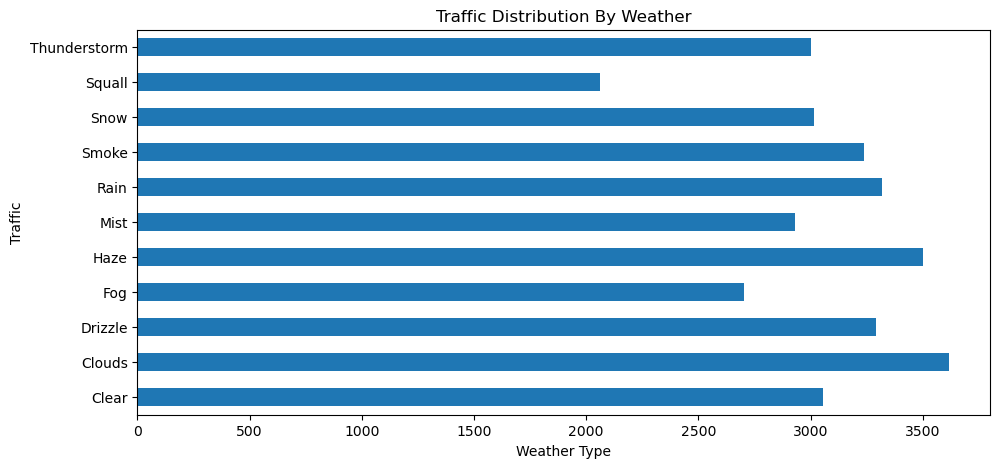

In [14]:
by_weather_type = traffic.groupby("weather_main").mean()
plt.figure(figsize = (11,5))
by_weather_type['traffic_volume'].plot.barh()
plt.title('Traffic Distribution By Weather')
plt.xlabel('Weather Type')
plt.ylabel('Traffic')
plt.show()

/var/folders/25/_g0dwxk50c55q9lqb8pbn9nc0000gp/T/ipykernel_4115/79396897.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = traffic.groupby("weather_description").mean()


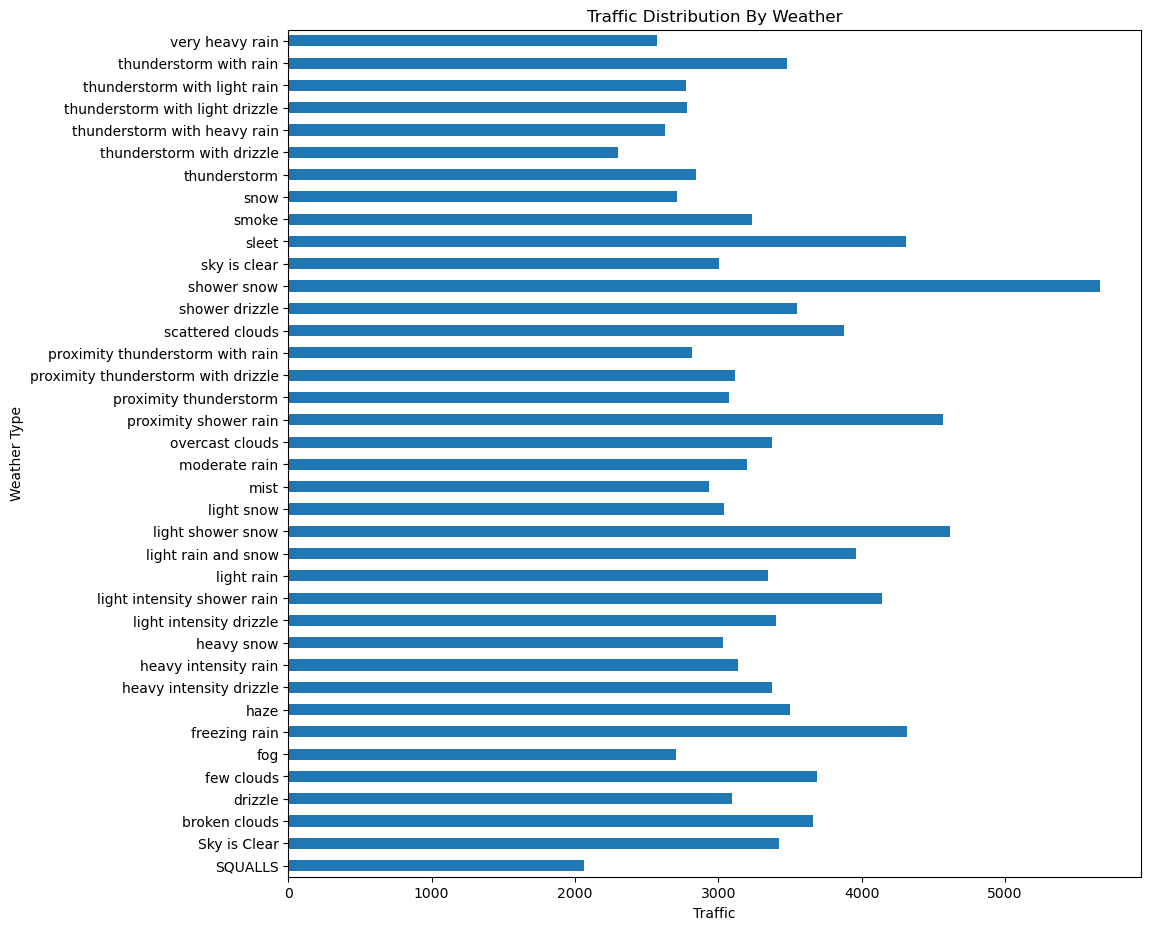

In [15]:
by_weather_description = traffic.groupby("weather_description").mean()
plt.figure(figsize = (11,11))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Traffic Distribution By Weather')
plt.ylabel('Weather Type')
plt.xlabel('Traffic')
plt.show()

Overall, it looks there are three indicators of heavy traffic: Shower Snow(exceeds 5000 cars), Light Shower Snow and Proximity Shower Rain. We can conclude that a combination of rain and show is a strong indicator for heavy traffic as seen by the 5000+ cars for that specific weather type.

Over the course of the project, we have seen that traffic is common during warmer months(May - October), week days in the morning hours(7-8am) and evening(4-5pm) which indicates when people are either travelling to work or returning from work. We have also concluded that traffic is heavy on certain days based on specific weather conditions i.e. snow and rain. 